# FMSI Project Notebook

Authors:
- Benjamin Peter
- Bastien Coutadeur
- Alexandre Dias
- Mathieu Guérin

Importing our work:

In [6]:
# Generating prime numbers
from genPrime import erathosthene, is_prime
from miller_rabin import MillerRabin, generate_prime

# RSA Implementation
from rsa import RSA

# Cracking RSA
import p_1_pollard
import rho_pollard
import fermat

#Timer
import time_cracking as tm

#Plot
import matplotlib.pyplot as plt

# Helper functions
from helper import tuple_val_eq

## Prime numbers generation

### Sieve of Eratosthenes

In [2]:
print("Generating prime numbers between 2 and 1024...")
L = erathosthene(1024)
print(L)

print()  # Newline
not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1024...
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021]

Success: All the numbers are prime numbers!


In [3]:
print("Generating prime numbers between 2 and 1048576...")
L = erathosthene(1048576)

not_primes = []
for p in L:
    if not is_prime(p):
        not_primes.append(p)
if not not_primes:
    print("Success: All the numbers are prime numbers!")
else:
    print("Error: Found non-prime numbers:", not_primes)

Generating prime numbers between 2 and 1048576...
Success: All the numbers are prime numbers!


### Basic primality test

We've implemented a basic primality test (`is_prime`), used above for checking that the sieve of eratosthenes works properly.

### Miller-Rabin primality test

We've implemented the Miller-Rabin primality test, faster than `is_prime`, for generating large prime numbers:

In [4]:
print("Generate random prime numbers between 2^127 and 2^128...")
print("1:", generate_prime(128))
print("2:", generate_prime(128))
print("3:", generate_prime(128))

Generate random prime numbers between 2^127 and 2^128...
1: 201088170311450132828204499690257651747
2: 230393948403899688091663681496068226471
3: 238737957161431141245086227457602956779


In [5]:
# Works for generating large prime numbers:
print("Generate random prime numbers between 2^1023 and 2^1024...")
print(generate_prime(1024))

Generate random prime numbers between 2^1023 and 2^1024...
161437457969092108516877777776390344650492654726580766199707934195448162707478873388898323531644832340986366455066323650453073858915050827802143730325000846157242077606411888730056470611451283703764473004850251978516033952717920689358782230222229555813050550968832032741839301835942450760628531311151225858819


## RSA Implementation

In [6]:
# Generate RSA public and private keys from given prime numbers
RSA.generate_keys(61, 53)

((3233, 7), (3233, 1783))

In [7]:
# Generate a RSA object from given prime numbers
r = RSA.generate(61, 53)

In [8]:
# The RSA ciphering modulus
r.n

3233

In [9]:
# The RSA public exponent
r.e

7

In [10]:
# The RSA public key
r.pub_key()

(3233, 7)

In [11]:
# The RSA private exponent
r.d

1783

In [12]:
# The RSA private key
r.priv_key()

(3233, 1783)

### Encryption

In [13]:
# Our clear message
msg = "Hello, world!"
print("Our message:", msg)

Our message: Hello, world!


In [14]:
# Encrypt a message
encrypted_msg = r.encrypt("Hello, world!")
print("Encrypted message:", encrypted_msg)

Encrypted message: [1087, 3071, 1877, 1877, 3183, 1129, 2774, 863, 3183, 1797, 1877, 2872, 2417]


Encryption is done character per character.

### Decryption

In [15]:
decrypted_msg = r.decrypt(encrypted_msg)
print("Decrypted message:", decrypted_msg)
if decrypted_msg == msg:
    print("This matches our original message!")
else:
    print("This does not match our original message..")

Decrypted message: Hello, world!
This matches our original message!


## Cracking RSA

We've implemented three cracking algorithms:
- Pollard's p-1 Algorithm
- Pollard's rho Algorithm
- Fermat's factorization Algorithm

_Note:  
In the examples below, we're using `tuple_val_eq` to check if the cracked primes match what is expected.  
This checks if `(p1, q1) == (p2, q2)` or `(p1, q1) == (q2, p2)`_ 

### Pollard's p-1 Algorithm

In [16]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = p_1_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = p_1_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Pollard's rho Algorithm

In [17]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = rho_pollard.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = rho_pollard.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (673, 661)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


### Fermat's factorization Algorithm

In [18]:
msg = "Hello, world! This is my very secret message."
print("Our message:", msg)

primes = (661, 673)
print("Encrypting using RSA, from prime numbers", primes)
r = RSA.generate(*primes)
encrypted_msg = r.encrypt(msg)
# print("Encrypted data:", encrypted_msg)

print()  # Newline
print(10 * '*', "Cracking with Fermat factorisation", 10 * '*')

print()  # Newline
cracked_primes = fermat.crack_primes(r.n)
print("Cracked primes:", cracked_primes)
print("Success!" if tuple_val_eq(cracked_primes, primes) else "Failure.")

print()  # Newline
cracked_msg = fermat.crack_msg(encrypted_msg, r.n)
print("Cracked message:", cracked_msg)
print("Success!" if cracked_msg == msg else "Failure.")

Our message: Hello, world! This is my very secret message.
Encrypting using RSA, from prime numbers (661, 673)

********** Cracking with Fermat factorisation **********

Cracked primes: (661, 673)
Success!

Cracked message: Hello, world! This is my very secret message.
Success!


In [21]:
time_array_rho, prime_array_rho = tm.time_crack(rho_pollard.crack_primes)

p = 3 q = 2 --- 0.0 seconds ---
p = 19 q = 17 --- 0.0001 seconds ---
p = 43 q = 41 --- 0.0002 seconds ---
p = 67 q = 71 --- 0.0014 seconds ---
p = 97 q = 101 --- 0.0006 seconds ---
p = 131 q = 127 --- 0.0025 seconds ---
p = 163 q = 157 --- 0.0015 seconds ---
Couldn't crack p = 191 q = 193
Couldn't crack p = 227 q = 229
Couldn't crack p = 257 q = 263
p = 283 q = 293 --- 0.0022 seconds ---
p = 337 q = 331 --- 0.5025 seconds ---
p = 367 q = 373 --- 0.0755 seconds ---
Couldn't crack p = 401 q = 409
p = 443 q = 439 --- 0.1009 seconds ---
Couldn't crack p = 467 q = 479
p = 509 q = 521 --- 0.0247 seconds ---
p = 563 q = 569 --- 0.0234 seconds ---
Couldn't crack p = 599 q = 601
p = 641 q = 631 --- 0.5815 seconds ---
p = 673 q = 661 --- 0.076 seconds ---
Couldn't crack p = 709 q = 719
Couldn't crack p = 751 q = 757
Couldn't crack p = 797 q = 809
Couldn't crack p = 829 q = 839
Couldn't crack p = 877 q = 881
Couldn't crack p = 919 q = 929
Couldn't crack p = 967 q = 971
Sucess rate: 15/13
[0.0, 0.

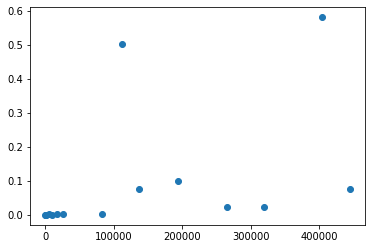

In [23]:
plt.plot(prime_array_rho, time_array_rho,'o')

In [18]:
time_array_fermat, prime_array_fermat = tm.time_crack(fermat.crack_primes)

Couldn't crack p = 2 q = 3
p = 17 q = 19 --- 0.0 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 67 q = 71 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0004 seconds ---
p = 127 q = 131 --- 0.0028 seconds ---
p = 157 q = 163 --- 0.003 seconds ---
p = 191 q = 193 --- 0.0038 seconds ---
p = 227 q = 229 --- 0.0058 seconds ---
p = 257 q = 263 --- 0.0086 seconds ---
p = 283 q = 293 --- 0.0025 seconds ---
p = 331 q = 337 --- 0.0059 seconds ---
p = 367 q = 373 --- 0.012 seconds ---
p = 401 q = 409 --- 0.0088 seconds ---
p = 439 q = 443 --- 0.0216 seconds ---
p = 467 q = 479 --- 0.0161 seconds ---
p = 509 q = 521 --- 0.0202 seconds ---
p = 563 q = 569 --- 0.0235 seconds ---
p = 599 q = 601 --- 0.0342 seconds ---
p = 631 q = 641 --- 0.0353 seconds ---
p = 661 q = 673 --- 0.0042 seconds ---
p = 709 q = 719 --- 0.0154 seconds ---
p = 751 q = 757 --- 0.0111 seconds ---
p = 797 q = 809 --- 0.0589 seconds ---
p = 829 q = 839 --- 0.0184 seconds ---
p = 877 q = 881 --- 0.0506 seconds ---
p = 919 q 

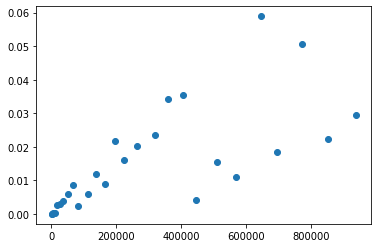

In [22]:
plt.plot(prime_array_fermat, time_array_fermat,'o')

In [24]:
time_array_p_1, prime_array_p_1 = tm.time_crack(p_1_pollard.crack_primes)

p = 3 q = 2 --- 0.0 seconds ---
p = 17 q = 19 --- 0.0 seconds ---
p = 41 q = 43 --- 0.0001 seconds ---
p = 71 q = 67 --- 0.0003 seconds ---
p = 97 q = 101 --- 0.0004 seconds ---
p = 127 q = 131 --- 0.0031 seconds ---
p = 163 q = 157 --- 0.0018 seconds ---
p = 193 q = 191 --- 0.0022 seconds ---
p = 229 q = 227 --- 0.0085 seconds ---
p = 257 q = 263 --- 0.006 seconds ---
p = 283 q = 293 --- 0.0035 seconds ---
p = 331 q = 337 --- 0.0063 seconds ---
p = 373 q = 367 --- 0.0072 seconds ---
p = 401 q = 409 --- 0.0154 seconds ---
p = 443 q = 439 --- 0.0208 seconds ---
p = 467 q = 479 --- 0.0526 seconds ---
p = 521 q = 509 --- 0.0196 seconds ---
p = 569 q = 563 --- 0.0269 seconds ---
p = 601 q = 599 --- 0.0323 seconds ---
p = 631 q = 641 --- 0.0452 seconds ---
p = 673 q = 661 --- 0.0072 seconds ---
p = 709 q = 719 --- 0.0156 seconds ---
p = 757 q = 751 --- 0.0116 seconds ---
p = 809 q = 797 --- 0.0691 seconds ---
p = 829 q = 839 --- 0.0208 seconds ---
p = 881 q = 877 --- 0.0516 seconds ---
p = 

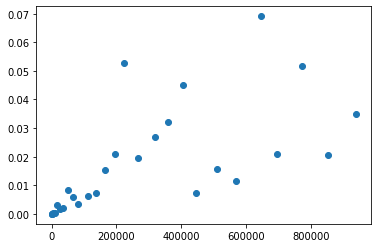

In [25]:
plt.plot(prime_array_p_1, time_array_p_1,'o')